In [10]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import os, sys
# import gsflow
# import flopy
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib as mpl
import geopandas as gpd
import pandas as pd

from conda_scripts import arich_functions
# import conda_scripts.make_map as mp
# import conda_scripts.plot_help as ph
# import conda_scripts.plot_wet as pw
# import conda_scripts.owhm as owhm
import conda_scripts.plot_help as plot_help
import conda_scripts

# import conda_scripts.rich_gis as rg
import plotly.graph_objects as go

# import cartopy.crs as ccrs 
# import contextily as ctx
# import xarray as xr
# import adjustText


In [ ]:
gw_stats_f = conda_scripts.wiski.wiski.get_gw_stations_in_basin(basins = ['SRP*'],final_only = True)

In [ ]:
gw_stats = conda_scripts.wiski.wiski.get_gw_stations_in_basin(basins = ['SRP*'],final_only = False)

In [4]:
gw_stats = conda_scripts.wiski.wiski.get_gw_stations_in_basin()

loading SRP*
trying...
https://www2.kisters.net/sonomacountygroundwater/KiWIS/KiWIS?service=kisters&type=queryServices&request=getTimeseriesList&datasource=0&format=html&station_name=SRP*&stationparameter_name=*levation*&returnfields=station_name,station_no,ts_id,ts_name,parametertype_name,coverage,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_id,ts_unitname
success
loading Son*
trying...
https://www2.kisters.net/sonomacountygroundwater/KiWIS/KiWIS?service=kisters&type=queryServices&request=getTimeseriesList&datasource=0&format=html&station_name=Son*&stationparameter_name=*levation*&returnfields=station_name,station_no,ts_id,ts_name,parametertype_name,coverage,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_id,ts_unitname
success
loading PET*
trying...
https://www2.kisters.net/sonomacountygroundwater/KiWIS/KiWIS?service=kisters&type=queryServices&request=getTimeseriesList&datasource=0&format=html&

c:\rich_py\conda_scripts\wiski\wiski.py:232: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  gw_elev = gw_elev.loc[~gw_elev.ts_name.str.contains('(rel/abs)'),:]


In [5]:
v_ = gw_stats.stationparameter_longname.str.upper().str.contains('ELEVATION').to_frame()
pd.concat([v_], axis=1)

NameError: name 'pd' is not defined

In [15]:
gw_stats_f.query("station_name=='SRP0736'")

,station_name,station_no,ts_id,ts_name,parametertype_name,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_unitname,from,to,Param_reclass,Site
822,SRP0736,SRPDMW-1-95,62568010,01.Final Elevation - Manual Measurement,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev-Manual,cmd,536.0,foot,2022-11-07 15:00:00,2022-11-07 15:00:00,Manual Measurement,SRP


In [19]:
def proc_tslist(gw_elev):
        import re
        v_ = gw_elev.stationparameter_longname.str.upper().str.contains('ELEVATION').to_frame()

        fil = pd.concat([v_], axis=1)
        gw_elev = gw_elev.loc[fil.any(axis=1),:]

        gw_elev = gw_elev.loc[~gw_elev.ts_name.str.upper().str.contains('TEST'),:]
        gw_elev = gw_elev.loc[~gw_elev.ts_name.str.contains('(rel/abs)'),:]
        gw_elev = gw_elev.loc[~gw_elev.ts_name.str.contains('Offset'),:]

        gw_elev = gw_elev.loc[~gw_elev.ts_shortname.str.contains('Cmd.O'),:]

        gw_elev = gw_elev.loc[~gw_elev.parametertype_name.str.contains('Vapor'),:]

        # gw_elev= gw_elev.drop_duplicates(['ts_name','parametertype_name','stationparameter_longname','ts_shortname'])

        def recl(series):
            if any([(('PRESSURE' in x.upper()) | ('TRANSDUCER' in x.upper())) for x in series.values]):
                return 'Pressure Transducer'
            else:
                return 'Manual Measurement'

        gw_elev['Param_reclass'] = gw_elev.loc[:, 'ts_name':'ts_type_name'].apply(recl, axis=1)

        # gw_elev = gw_elev.loc[gw_elev['from'].notnull(),:]

        # def classify(station):
        #     if 'SON' in station.upper():
        #         return 'SON'
        #     elif 'PET' in station.upper():
        #         return "PET"
        #     else:
        #         return 'SRP'

        # gw_elev['Site'] = gw_elev['station_name'].apply(classify)

        rep = lambda x: re.sub(r'\d+', '', x)
        gw_elev['Site'] = gw_elev['station_name'].apply(rep)

        gw_elev = gw_elev.sort_values('Site')
        
        return gw_elev
    
proc_tslist(gw_stats.query("station_name=='SRP0736'"))

C:\Users\arich\AppData\Local\Temp\1\ipykernel_13624\989143345.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  gw_elev = gw_elev.loc[~gw_elev.ts_name.str.contains('(rel/abs)'),:]


,station_name,station_no,ts_id,ts_name,parametertype_name,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_unitname,from,to,Param_reclass,Site
822,SRP0736,SRPDMW-1-95,62568010,01.Final Elevation - Manual Measurement,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev-Manual,cmd,536.0,foot,2022-11-07 15:00:00,2022-11-07 15:00:00,Manual Measurement,SRP
824,SRP0736,SRPDMW-1-95,62570010,03.Final Elevation - Transducer,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev-Transducer,cmd,536.0,foot,NaT,NaT,Pressure Transducer,SRP
825,SRP0736,SRPDMW-1-95,62571010,DailyMean,Groundwater_elevation,Groundwater_elevation,GWEL,Day.Mean.P,aggmean,536.0,foot,NaT,NaT,Manual Measurement,SRP
826,SRP0736,SRPDMW-1-95,62572010,Spring Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Year.Mean.P,aggmean,536.0,foot,NaT,NaT,Manual Measurement,SRP
827,SRP0736,SRPDMW-1-95,62573010,Month.Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Month.Mean,aggmean,536.0,foot,NaT,NaT,Manual Measurement,SRP


In [27]:
gdf = conda_scripts.wiski.wiski.get_stations(site = 'SRP')

In [40]:
cur = gpd.read_file("C:\GSP\waterlevel\GSP_annual_reports_SRP_2023_v2\GIS\SRP_2022_Fall_Shallow.shp")

In [41]:
cur

,Station Na,Observatio,Easting,Northing,rasterelev,Well_Depth,predicted,Residual,label,geometry
0,SRP0011,99.315,6.322845e+06,1.913541e+06,138.790000,Shallow,81.683861,17.631139,99 (+18),POINT (6322844.942 1913541.162)
1,SRP0052,100.790,6.340872e+06,1.951076e+06,136.840000,Shallow,103.803885,-3.013885,101 (-3),POINT (6340872.044 1951076.047)
2,SRP0092,72.680,6.356942e+06,1.898756e+06,98.190000,Shallow,73.929946,-1.249946,73 (-1),POINT (6356941.821 1898755.918)
3,SRP0106,82.500,6.360218e+06,1.899714e+06,101.600000,Shallow,80.833189,1.666811,82 (+2),POINT (6360217.617 1899713.701)
4,SRP0112,184.710,6.368167e+06,1.923945e+06,207.420000,Shallow,186.593474,-1.883474,185 (-2),POINT (6368167.040 1923944.952)
5,SRP0114,184.470,6.367645e+06,1.923111e+06,209.820000,Shallow,185.827333,-1.357333,184 (-1),POINT (6367645.266 1923111.199)
6,SRP0265,61.780,6.334684e+06,1.903446e+06,72.680448,Shallow,62.082369,-0.302369,62 (-0),POINT (6334684.355 1903446.140)
7,SRP0267,40.270,6.330930e+06,1.904228e+06,81.217360,Shallow,43.746041,-3.476041,40 (-3),POINT (6330930.378 1904227.543)
8,SRP0269,79.080,6.329856e+06,1.904468e+06,90.766112,Shallow,64.671773,14.408227,79 (+14),POINT (6329856.162 1904467.981)
9,SRP0272,65.980,6.338431e+06,1.905265e+06,83.577398,Shallow,70.381979,-4.401979,66 (-4),POINT (6338431.312 1905265.322)


In [37]:
gdf.loc[gdf.station_name.isin(mitch[mitch=='SRP0736']),:].explore()

In [25]:
conda_scripts.wiski.gw_data.get_gw_data('62582010')

(Empty DataFrame
 Columns: [Measurement]
 Index: [],
 Empty DataFrame
 Columns: [Value]
 Index: [])

In [24]:
gw_stats.query("station_name=='SRP0737'")

,station_name,station_no,ts_id,ts_name,parametertype_name,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_unitname,from,to
828,SRP0737,SRPDMW-1-190,62580010,01.Final Elevation - Manual Measurement,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev-Manual,cmd,536.0,foot,2022-11-07 15:00:00,2022-11-07 15:00:00
829,SRP0737,SRPDMW-1-190,62581010,02.Calculated Head Offset,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.HeadOffset,cmd,536.0,foot,2022-11-07 15:00:00,2022-11-07 15:00:00
830,SRP0737,SRPDMW-1-190,62582010,03.Final Elevation - Transducer,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev-Transducer,cmd,536.0,foot,NaT,NaT
831,SRP0737,SRPDMW-1-190,62583010,DailyMean,Groundwater_elevation,Groundwater_elevation,GWEL,Day.Mean.P,aggmean,536.0,foot,NaT,NaT
832,SRP0737,SRPDMW-1-190,62584010,Spring Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Year.Mean.P,aggmean,536.0,foot,NaT,NaT
833,SRP0737,SRPDMW-1-190,62585010,Month.Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Month.Mean,aggmean,536.0,foot,NaT,NaT


In [3]:
gw_stats.Param_reclass.unique()

array(['Manual Measurement', 'Pressure Transducer'], dtype=object)

In [4]:
gw_stats.query("Param_reclass=='Pressure Transducer'").drop_duplicates(gw_stats.loc[:,'ts_name':'ts_type_name'].columns)

,station_name,station_no,ts_id,ts_name,parametertype_name,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_unitname,from,to,Param_reclass,Site
92,PET0172,PET-D06-01_Corona,57699010,03.Final Elevation - Transducer,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev-Transducer,cmd,536.0,foot,2019-11-14 14:00:00,2022-12-30 13:00:00,Pressure Transducer,PET
643,Son0320,SV-MW2-SW,58524010,Final Elevation-Transducer Edit,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd-2,cmd,536.0,foot,2012-01-13 14:15:00,2021-07-20 11:45:00,Pressure Transducer,Son


In [5]:
gw_stats.query("Param_reclass!='Pressure Transducer'").drop_duplicates(gw_stats.loc[:,'ts_name':'ts_type_name'].columns)

,station_name,station_no,ts_id,ts_name,parametertype_name,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_unitname,from,to,Param_reclass,Site
155,PET0197,PVDMW-4-505,62560010,Month.Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Month.Mean.P,aggmean,536.0,foot,2019-11-01 00:00:00,2022-12-01 00:00:00,Manual Measurement,PET
53,PET0028,382623N1227218W001,47677010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,1980-10-10 00:00:00,2020-02-13 00:00:00,Manual Measurement,PET
90,PET0172,PET-D06-01_Corona,57697010,01.Final Elevation - Manual Measurement,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev-Manual,cmd,536.0,foot,2019-11-25 16:15:00,2022-12-08 13:00:00,Manual Measurement,PET
154,PET0197,PVDMW-4-505,62559010,Year.Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Year.Mean,aggmean,536.0,foot,2019-01-01 00:00:00,2022-01-01 00:00:00,Manual Measurement,PET
93,PET0172,PET-D06-01_Corona,57700010,Day.Mean.Production,Groundwater_elevation,Groundwater_elevation,GWEL,Day.Mean.P,aggmean,536.0,foot,2019-11-14 00:00:00,2022-12-30 00:00:00,Manual Measurement,PET
581,SRP0358,SCWA_TODD_BLUE,60759010,Month.Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Month.Mean,aggmean,536.0,foot,2007-12-01 00:00:00,2022-11-01 00:00:00,Manual Measurement,SRP
494,SRP0350,SCWA_SEB_MW_02,57997010,Daily Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Day.Mean.P,aggmean,536.0,foot,2007-12-10 00:00:00,2022-10-17 00:00:00,Manual Measurement,SRP
578,SRP0038,SRP-D16-02,57880010,Yearly Spring Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Year.Mean.P,aggmean,536.0,foot,2009-01-01 00:00:00,2017-01-01 00:00:00,Manual Measurement,SRP
573,SRP0364,SCWA_Copeland_C-5,57988010,DailyMean,Groundwater_elevation,Groundwater_elevation,GWEL,Day.Mean.P,aggmean,536.0,foot,2013-12-27 00:00:00,2023-01-06 00:00:00,Manual Measurement,SRP
542,SRP0364,SCWA_Copeland_C-5,58014010,Spring Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Year.Mean.P,aggmean,536.0,foot,2013-01-01 00:00:00,2023-01-01 00:00:00,Manual Measurement,SRP


# load the existing database of measurements. this will be used to identify ts_id's that need to be updated.

filtering done on this dataset will follow through to updated dataets. 

<span style="color:red">no pressure transducer datasets will be updated, assuming they're labeled correctly.</span>.


In [1]:
import conda_scripts

c:\rich_py\conda_scripts\utils\load_all_gw_wiski.py:57: DeprecationWarning: invalid escape sequence \{
  print('saving all new data to" {:}\{:}'.format(outfolder,outfile))


In [2]:
folder = r"C:\GSP\waterlevel\regression_data"

allgw = conda_scripts.utils.load_all_gw_wiski.load_all_gw(download = False,
                                             outfolder = folder,
                                             filter_manual= True,
                                             outfile='all_gw_for_surf_2023_03_09.csv')

reading C:\GSP\waterlevel\regression_data\all_gw_for_surf_2023_03_09.csv


c:\rich_py\conda_scripts\utils\load_all_gw_wiski.py:82: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  maindf = pd.read_csv(os.path.join(outfolder,outfile))


filtering to remove non-manual measurements via the ts_type_name==aggmean
filtering of raw observation data. number of obs:

before
	(820447, 17)

and after:
	(310423, 16)

done loading observed data


In [7]:
gw_stats.head(1)

,station_name,station_no,ts_id,ts_name,parametertype_name,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_unitname,from,to,Param_reclass,Site
173,PET0210,Lakeville_Cr_PZ3,63410010,Month.Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Month.Mean.P,aggmean,536.0,foot,2009-12-01 00:00:00,2023-12-01 00:00:00,Pressure Transducer,PET


In [8]:
gw_stats.query("ts_id==30030010")

,station_name,station_no,ts_id,ts_name,parametertype_name,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_unitname,from,to,Param_reclass,Site
1,PET0001,SV-L22-01,30030010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,1997-10-13 13:08:26,2015-10-15 00:00:00,Manual Measurement,PET


In [11]:
def date_max(df):
    
    return df.index.max()

def istherenewer(date,ts_id, gw_stats):
    '''
    date: date of max existing observed data in database
    gw_stats: wiski database
    '''
    datedbmax = gw_stats.query(f"ts_id=={ts_id}")
    
    if datedbmax.shape[0]>0:
        datedbmax = datedbmax.loc[:,'to'].max()
        newer = (date+pd.Timedelta(1, unit = 'D'))<(datedbmax)
    else:
        newer = True
    
    return newer

def find_needing_update():
    cnt = 0
    needed_ts = {}
    for ts, df in allgw.groupby('ts_id'):
        dmax = date_max(df)


        if gw_stats.ts_id.isin([ts]).any():
            new = istherenewer(dmax, ts, gw_stats)
        else:
            new = False
        if new:
            print(f"max date of current observations: {dmax}")
            dd = gw_stats.query(f"ts_id=={ts}").to.max()
            print(f"max date of database: {dd}")
            print(df.station_name.unique())
            needed_ts[ts] = {'date_max_db':dmax, 'station':df.station_name.unique()}
            print('----\n')

        else:
            print(f"ts_id: {ts}")

        cnt+=1
    return needed_ts

needed_ts = find_needing_update()

list(needed_ts.keys())[0:10]

ts_id: 30030010
ts_id: 30034010
ts_id: 30038010
ts_id: 30042010
ts_id: 30046010
ts_id: 30050010
ts_id: 30054010
ts_id: 30058010
ts_id: 30062010
max date of current observations: 2013-04-30 00:00:00
max date of database: 2015-10-23 00:00:00
['Son0008']
----

ts_id: 30070010
max date of current observations: 2016-10-29 00:00:00
max date of database: 2017-04-15 00:00:00
['Son0010']
----

max date of current observations: 2022-10-20 00:00:00
max date of database: 2023-04-12 00:00:00
['Son0011']
----

ts_id: 30082010
ts_id: 30086010
ts_id: 30090010
ts_id: 30094010
max date of current observations: 2022-10-20 00:00:00
max date of database: 2023-04-12 00:00:00
['Son0016']
----

max date of current observations: 2017-04-22 00:00:00
max date of database: 2017-11-01 00:00:00
['Son0017']
----

max date of current observations: 2015-03-29 00:00:00
max date of database: 2015-10-23 00:00:00
['Son0018']
----

ts_id: 30110010
max date of current observations: 2022-10-20 00:00:00
max date of database: 

[30066010,
 30074010,
 30078010,
 30098010,
 30102010,
 30106010,
 30118010,
 30142010,
 30158010,
 30162010]

# check for missing stations

look for stations in the wiski database that are not in the all_measurements file

NameError: name 'missing_stats' is not defined

In [14]:
missing_stats = gw_stats.loc[~gw_stats.loc[:,'station_no'].isin(allgw.station_no),:].copy()
# missing_stats = missing_stats.loc[~missing_stats.ts_name.str.contains('Mean'),]
# missing_stats = missing_stats.loc[~missing_stats.ts_name.str.contains('Trans'),]


def ltime(ser):
    return (ser['to']-ser['from']).days
missing_stats.loc[:,'ndays'] = missing_stats.apply(ltime,axis = 1)

# missing_stats = missing_stats.loc[missing_stats.ndays>30]
print('these are the number of stations not in the GW database...')

display(missing_stats.drop_duplicates('station_name').groupby('Site').count().loc[:,['ts_id']])
missing_stats.sort_values('station_name')

these are the number of stations not in the GW database...


,ts_id
Site,
PET,3
SRP,2
Son,2


,station_name,station_no,ts_id,ts_name,parametertype_name,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_unitname,from,to,Param_reclass,Site,ndays
156,PET0208,PET-H06-01_Manor,63065010,01.Final Elevation - Manual Measurement,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev-Manual,cmd,536.0,foot,2022-12-01 17:00:00,2023-11-29 10:30:00,Manual Measurement,PET,362
158,PET0208,PET-H06-01_Manor,63067010,03.Final Elevation - Transducer,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev-Transducer,cmd,536.0,foot,2009-12-31 16:00:00,2023-12-12 00:00:00,Pressure Transducer,PET,5093
159,PET0208,PET-H06-01_Manor,63068010,Day.Mean.Production,Groundwater_elevation,Groundwater_elevation,GWEL,Day.Mean.P,aggmean,536.0,foot,2009-12-31 00:00:00,2023-12-12 00:00:00,Pressure Transducer,PET,5094
160,PET0208,PET-H06-01_Manor,63069010,Year.Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Year.Mean,aggmean,536.0,foot,2009-01-01 00:00:00,2023-01-01 00:00:00,Manual Measurement,PET,5113
161,PET0208,PET-H06-01_Manor,63070010,Month.Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Month.Mean.P,aggmean,536.0,foot,2009-12-01 00:00:00,2023-12-01 00:00:00,Pressure Transducer,PET,5113
167,PET0209,Lakeville_Cr_PZ1,63397010,Month.Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Month.Mean.P,aggmean,536.0,foot,2009-12-01 00:00:00,2023-12-01 00:00:00,Pressure Transducer,PET,5113
162,PET0209,Lakeville_Cr_PZ1,63392010,01.Final Elevation - Manual Measurement,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev-Manual,cmd,536.0,foot,2022-12-15 16:00:00,2023-07-14 13:00:00,Manual Measurement,PET,210
164,PET0209,Lakeville_Cr_PZ1,63394010,03.Final Elevation - Transducer,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev-Transducer,cmd,536.0,foot,2009-12-31 16:00:00,2023-12-12 00:00:00,Pressure Transducer,PET,5093
165,PET0209,Lakeville_Cr_PZ1,63395010,Day.Mean.Production,Groundwater_elevation,Groundwater_elevation,GWEL,Day.Mean.P,aggmean,536.0,foot,2009-12-31 00:00:00,2023-12-12 00:00:00,Pressure Transducer,PET,5094
166,PET0209,Lakeville_Cr_PZ1,63396010,Year.Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Year.Mean,aggmean,536.0,foot,2009-01-01 00:00:00,2023-01-01 00:00:00,Manual Measurement,PET,5113


# to add new stations, do this code section

In [15]:
add_new_stats =True

In [16]:
if add_new_stats:
    # new_stats = pd.read_excel("SRP WISKI Updates Fall 2021 Data.xlsx", 'Sheet2')
    # new_stats.columns = ['station']
    new_stats = missing_stats.loc[:,['station_name']].rename(columns = {'station_name':'station'})
    
    tsi = pd.DataFrame.from_dict(needed_ts).T
    tsi.loc[:,'station'] = tsi.loc[:,'station'].apply(lambda x: x[0])

    print(f"these are stations from the new stations list that are in ts_id\
database:\n{new_stats.loc[new_stats.station.isin(tsi.station)]}\n")
    print(f"these are stations from the new stations list that are NOT in ts_id\
database:\n{new_stats.loc[~new_stats.station.isin(tsi.station)]}\n\n")

    print(f"these are stations from the new stations list that are in gw_stats\
database:\n{new_stats.loc[new_stats.station.isin(gw_stats.station_name)]}")
    print(f"these are stations from the new stations list that are NOT in gw_stats\
database:\n{new_stats.loc[~new_stats.station.isin(gw_stats.station_name)]}")

    def add_new_ts_ids(needed_ts, all_gw_filtered):
        print('\n\n---adding new stations---\n')
        cnt = 0

        for ts, df in all_gw_filtered.groupby('ts_id'):

            dmax = 1900 # early year so that all observations are loaded
            print(f"max date of current observations: {dmax}")
            dd = gw_stats.query(f"ts_id=={ts}").to.max()
            print(f"max date of database: {dd}")
            print(df.station_name.unique())
            needed_ts[ts] = {'date_max_db':dmax, 'station':df.station_name.unique()}
            print('----\n')

            cnt+=1
        return needed_ts

    all_gw_filtered = gw_stats.loc[gw_stats.station_name.isin(new_stats.station)]
    all_gw_filtered = all_gw_filtered.query("ts_type_name!='aggmean'")

    new_ts_id = add_new_ts_ids({}, all_gw_filtered)

these are stations from the new stations list that are in ts_iddatabase:
Empty DataFrame
Columns: [station]
Index: []

these are stations from the new stations list that are NOT in ts_iddatabase:
     station
173  PET0210
172  PET0210
156  PET0208
158  PET0208
159  PET0208
160  PET0208
161  PET0208
162  PET0209
164  PET0209
165  PET0209
166  PET0209
168  PET0210
170  PET0210
171  PET0210
167  PET0209
887  SRP0746
886  SRP0746
885  SRP0746
884  SRP0746
882  SRP0746
881  SRP0745
880  SRP0745
879  SRP0745
878  SRP0745
876  SRP0745
297  Son0122
334  Son0098


these are stations from the new stations list that are in gw_statsdatabase:
     station
173  PET0210
172  PET0210
156  PET0208
158  PET0208
159  PET0208
160  PET0208
161  PET0208
162  PET0209
164  PET0209
165  PET0209
166  PET0209
168  PET0210
170  PET0210
171  PET0210
167  PET0209
887  SRP0746
886  SRP0746
885  SRP0746
884  SRP0746
882  SRP0746
881  SRP0745
880  SRP0745
879  SRP0745
878  SRP0745
876  SRP0745
297  Son0122
334  Son009

In [17]:
new_ts_id

{30402010: {'date_max_db': 1900, 'station': array(['Son0098'], dtype=object)},
 30470010: {'date_max_db': 1900, 'station': array(['Son0122'], dtype=object)},
 62957010: {'date_max_db': 1900, 'station': array(['SRP0745'], dtype=object)},
 62959010: {'date_max_db': 1900, 'station': array(['SRP0745'], dtype=object)},
 62969010: {'date_max_db': 1900, 'station': array(['SRP0746'], dtype=object)},
 62971010: {'date_max_db': 1900, 'station': array(['SRP0746'], dtype=object)},
 63065010: {'date_max_db': 1900, 'station': array(['PET0208'], dtype=object)},
 63067010: {'date_max_db': 1900, 'station': array(['PET0208'], dtype=object)},
 63392010: {'date_max_db': 1900, 'station': array(['PET0209'], dtype=object)},
 63394010: {'date_max_db': 1900, 'station': array(['PET0209'], dtype=object)},
 63405010: {'date_max_db': 1900, 'station': array(['PET0210'], dtype=object)},
 63407010: {'date_max_db': 1900, 'station': array(['PET0210'], dtype=object)}}

In [18]:
missing_stats.query("ts_id==59758010")

,station_name,station_no,ts_id,ts_name,parametertype_name,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_unitname,from,to,Param_reclass,Site,ndays


# load the raw data NEW data to be added to the existing dataset


either from existing csv or from wiski.

In [19]:
maindf_missing.query("ts_id==59758010")

NameError: name 'maindf_missing' is not defined

In [20]:
df, nana = conda_scripts.wiski.gw_data.get_gw_data(pname = int(59758010), 
                                                   start_year = 2000, 
                                                   resampled = False, 
                                                   keep_qc = False)
df

,Measurement
Timestamp,
2020-06-16 14:00:00,89.05
2020-10-15 14:20:00,84.12
2021-03-22 17:05:00,86.80
2021-10-18 16:35:00,81.05
2022-04-11 16:15:00,86.95
2022-11-02 13:00:00,82.16
2023-04-17 15:30:00,88.83
2023-10-30 15:00:00,85.15


In [22]:
def load_new_obs(needed_ts, file = None, dload = False):

        
    if dload is False:
        if file is None:
            file = os.path.join('..','regression_data','regress_data_2022_update.csv')
        if os.path.exists(file):
            print(f'reading existing file\n {file}')
            maindf = pd.read_csv(file,parse_dates=['Timestamp'])
            maindf = maindf.set_index('Timestamp')

            maindf = maindf.reset_index().groupby(['station_name','ts_id',
                                           pd.Grouper(key='Timestamp', freq='D')]).mean().reset_index()
            maindf = maindf.set_index('Timestamp')

    else:
        print('downloading data from server')
        maindf = pd.DataFrame()

        # for name, group in infile.groupby('station_name'):
        for key in needed_ts.keys():
            # if not (os.path.exists(os.path.join(outfolder, name + '.png'))):
                #         try:
                # t = gw.wiski_plot(name, group)
                print(key)
                pname = key
                start_year=needed_ts[key]['date_max_db']
                resampled=False
                keep_qc=False


                df, nana = conda_scripts.wiski.gw_data.get_gw_data(pname = pname, 
                                                                   start_year = start_year, 
                                                                   resampled = resampled, 
                                                                   keep_qc = keep_qc)

                if df.shape[0] == 0:
                    print('no data from wiski')
                    continue

                df.loc[:,'ts_id'] = key
                df.loc[:,'station_name'] = needed_ts[key]['station'][0]
                # maindf = maindf.append(df)
                maindf = pd.concat([maindf, df])


    print('done')
    return maindf
    
# load data from stations that need to be updated
maindf = load_new_obs(needed_ts,file = False, dload = True)
#load data from stations that don't yet exist
maindf_missing = load_new_obs(new_ts_id,file = False, dload = True)

downloading data from server
30066010
30074010
30078010
30098010
30102010
30106010
30118010
30142010
30158010
30162010
30174010
30182010
30206010
30210010
30214010
30218010
30226010
30238010
30242010
30246010
30250010
30258010
30270010
30286010
30290010
30306010
30310010
30322010
30346010
30350010
30362010
30374010
30382010
30390010
30406010
30446010
30450010
30466010
30538010
30546010
30570010
30586010
30590010
30594010
30622010
30626010
30638010
30642010
30678010
30682010
30690010
30698010
30702010
30718010
30738010
30762010
30870010
30882010
30894010
30902010
30906010
30918010
30938010
30962010
30974010
30978010
30986010
31002010
31026010
31030010
31034010
31046010
31066010
31086010
31090010
31106010
31110010
31114010
31122010
31142010
31146010
31154010
32306010
32867010
32874010
32888010
32895010
32909010
32923010
32930010
32953010
32967010
33030010
33037010
33044010
33051010
33058010
33065010
33072010
33079010
33121010
33128010
33135010
33142010
33149010
33156010
33163010
33170010

In [23]:
missing_stats.loc[~missing_stats.station_name.isin(maindf_missing.station_name)]

,station_name,station_no,ts_id,ts_name,parametertype_name,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_unitname,from,to,Param_reclass,Site,ndays
297,Son0122,SV-M11-01,30470010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,2016-04-19 00:00:00,2017-10-08 00:00:00,Manual Measurement,Son,537
334,Son0098,SV-K15-12,30402010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,2010-03-15 00:00:00,2014-02-09 00:00:00,Manual Measurement,Son,1427


In [24]:
def summarize(df, filter_excess = False):
    '''
    summarize number of measurements from dfs
    
    '''
    _c = pd.merge(df.ts_id.value_counts().to_frame('count'),
         gw_stats.loc[:,['ts_id','ts_name','station_name','station_no']], 
             left_index = True, right_on = 'ts_id')
    
    display(_c)
    
    if (_c.loc[:,'count']>1000).any():
        warnings.warn('there are wells with more than 1000 observations. IS LIKELY pressure transducer')
        
        if filter_excess:
            ids = _c.loc[_c.loc[:,'count']>1000].ts_id
            print(ids)
            df = df.loc[~df.ts_id.isin(ids)]
    return df

maindf_missing = summarize(maindf_missing, False)
maindf = summarize(maindf, False)

,count,ts_id,ts_name,station_name,station_no
884,5562,62971010,03.Final Elevation - Transducer,SRP0746,SRP-D08-04_MWCr_at_STS
164,5062,63394010,03.Final Elevation - Transducer,PET0209,Lakeville_Cr_PZ1
170,5061,63407010,03.Final Elevation - Transducer,PET0210,Lakeville_Cr_PZ3
158,3523,63067010,03.Final Elevation - Transducer,PET0208,PET-H06-01_Manor
878,1702,62959010,03.Final Elevation - Transducer,SRP0745,SRP-B08-01_MWCr_at_WindsCr
882,5,62969010,01.Final Elevation - Manual Measurement,SRP0746,SRP-D08-04_MWCr_at_STS
876,4,62957010,01.Final Elevation - Manual Measurement,SRP0745,SRP-B08-01_MWCr_at_WindsCr
156,4,63065010,01.Final Elevation - Manual Measurement,PET0208,PET-H06-01_Manor
162,2,63392010,01.Final Elevation - Manual Measurement,PET0209,Lakeville_Cr_PZ1
168,2,63405010,01.Final Elevation - Manual Measurement,PET0210,Lakeville_Cr_PZ3


C:\Users\arich\AppData\Local\Temp\1\ipykernel_11716\700512279.py:13: UserWarning: there are wells with more than 1000 observations. IS LIKELY pressure transducer
  warnings.warn('there are wells with more than 1000 observations. IS LIKELY pressure transducer')


,count,ts_id,ts_name,station_name,station_no
771,14842,59228010,02.Final Water Elevation,SRP0725,Sebastopol_City_Well_5
583,760,30902010,02.Final Water Elevation,SRP0057,SRP-F09-02
430,759,30938010,02.Final Water Elevation,SRP0068,SRP-G11-01
476,759,31110010,02.Final Water Elevation,SRP0111,SRP-K11-01
133,758,31142010,02.Final Water Elevation,SRP0119,SRP-L13-01
...,...,...,...,...,...
282,1,31154010,02.Final Water Elevation,SRP0122,SRP-M10-01
592,1,47949010,02.Final Water Elevation,SRP0326,385117N1227863W002
416,1,47945010,02.Final Water Elevation,SRP0325,385117N1227863W001
341,1,32888010,01.Final Elevation - Manual Measurement,SRP0360,SCWA_Copeland_A-1


C:\Users\arich\AppData\Local\Temp\1\ipykernel_11716\700512279.py:13: UserWarning: there are wells with more than 1000 observations. IS LIKELY pressure transducer
  warnings.warn('there are wells with more than 1000 observations. IS LIKELY pressure transducer')


number of measurements (27, 16)


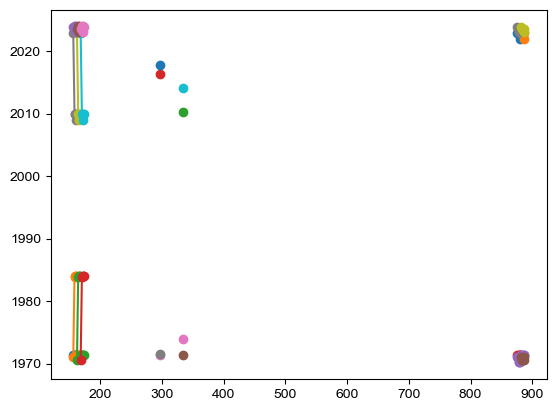

In [25]:
missing_stats.drop(columns = 'ts_id').set_index('station_name',append = True).unstack(1).droplevel(0,1).plot(backend = 'matplotlib', marker = 'o', legend = False)
print(f'number of measurements {missing_stats.shape}')

# load existing database of observations

In [17]:
maindf.insert(3, 'year', maindf.index.year.values, True)

In [18]:
maindf = maindf.iloc[:,:-1]

<AxesSubplot:xlabel='Timestamp'>

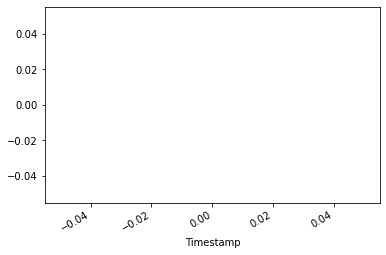

In [19]:
maindf.query("station_name=='SRP0111'").loc[:,'Measurement'].plot(marker = '.', ls = '')

In [26]:
maindf

,Measurement,ts_id,station_name
Timestamp,,,
2013-04-30 00:00:00,467.98,30066010,Son0008
2016-10-29 00:00:00,408.72,30074010,Son0010
2022-10-20 00:00:00,380.52,30078010,Son0011
2023-04-12 00:00:00,407.20,30078010,Son0011
2022-10-20 00:00:00,398.97,30098010,Son0016
...,...,...,...
2023-11-20 11:00:00,70.89,62640010,SRP0742
2022-11-03 15:00:00,70.00,62652010,SRP0743
2023-11-20 11:00:00,70.94,62652010,SRP0743


In [20]:
maindf

,Measurement,ts_id,station_name
Timestamp,,,
2013-04-30 00:00:00,467.98,30066010,Son0008
2016-10-29 00:00:00,408.72,30074010,Son0010
2017-04-22 00:00:00,439.73,30102010,Son0017
2015-03-29 00:00:00,470.80,30106010,Son0018
2017-04-27 00:00:00,786.37,30206010,Son0044
...,...,...,...
2023-01-22 12:00:00,30.71,47781010,SRP0250
2021-11-06 00:00:00,350.62,47977010,SRP0340
2022-03-04 00:00:00,350.52,47977010,SRP0340


In [27]:
maindf.groupby(['station_name', 'year']).count().loc[:,['Measurement']].sort_values('Measurement', ascending = False)

KeyError: 'year'

<Axes: xlabel='Timestamp'>

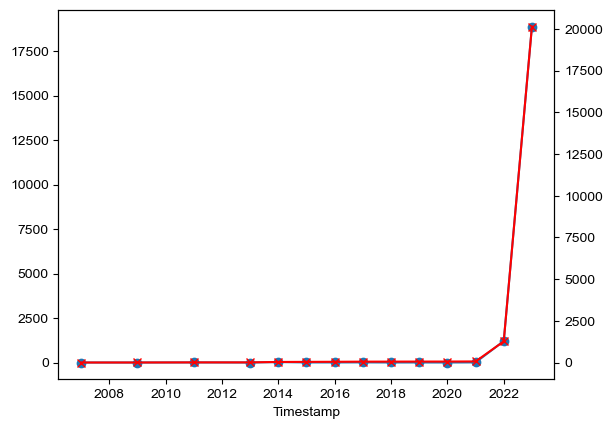

In [28]:
ax = maindf.index.year.value_counts().sort_index().plot(marker = 'o')
ax2 = ax.twinx()
maindf.index.year.value_counts().sort_index().cumsum().plot(ax = ax2, marker = 'x', c = 'r')


In [36]:
def load_old(old_db = None):
    if old_db is None:
        # old_db = r'C:\GSP\waterlevel\regression_data\all_gw_for_surf.csv'
        old_db = r'C:\GSP\waterlevel\regression_data\all_gw_for_surf_2023_03_09.csv'
        
    
    print(f"loading {old_db}")
    rawdb = pd.read_csv(old_db)
    rawdb.loc[:,'Timestamp'] = pd.to_datetime(rawdb.loc[:,'Timestamp'], format = 'mixed')
    rawdb = rawdb.drop(columns = rawdb.filter(regex = 'Unnamed'))
    rawdb = rawdb.dropna(how = 'all')
    
    assert len(np.intersect1d(['ts_id'], rawdb.columns))==1, \
    f"missing columns {np.intersect1d(['ts_id'], rawdb.columns)}"
    print(rawdb.dtypes)
    print(rawdb.head())
    rawdb = rawdb.astype({'ts_id':np.int64})
    # rawdb = rawdb.astype({'ts_id':np.int64,'parametertype_id':np.int64})
    return rawdb

def add_info2obs(allgw = None, newobs = None):
    '''
    allgw is used only for metadata purposes only
    '''
    
    if allgw is None:
        folder = r"C:\GSP\waterlevel\regression_data"

        allgw = conda_scripts.utils.load_all_gw_wiski.load_all_gw(download = False,
                                                     outfolder = folder,
                                                     filter_manual= True)
    info =  allgw.loc[:,['ts_id',
                    'ts_name',	
                    'parametertype_name',
                    'stationparameter_longname',
                    'stationparameter_no',
                    'ts_shortname',
                    'ts_type_name',
                    'Param_reclass',
                    'station_no',
                    'Site']].drop_duplicates('ts_id').reset_index(drop= True)
    
    df = newobs.reset_index()
    
    df.loc[:,'Version'] = "2024a"
    df = df.rename(columns = {'Measurement':'Manual Measurement'})
    
    assert df.ts_id.isin(info.ts_id).all(), f'there are {df.ts_id.isin(info.ts_id).sum()} missing ts_ids in the info df'
    df = pd.merge(df, info, on = 'ts_id')
    
    # assert len(np.intersect1d(['ts_id'], df.columns))==1,  f"missing columns "
    # print(df.dtypes)
    # print(df.head())
    df = df.astype({'ts_id':np.int64,})
    
    return df

def append_new_old(old_df, new_df):
    
    match = [ xi for xi in new_df.columns if xi in old_df]
    missiing = [ xi for xi in new_df.columns if xi not in old_df]
    
    print(f'these are the matching cols\n{match}')
    print(f'these are the missiing cols\n{missiing}')
    
    dfall = pd.concat([old_df,new_df])
    dfall.loc[:,'Version'] = dfall.loc[:,'Version'].fillna('2020')
    dfall.loc[:,'Timestamp'] = pd.to_datetime(dfall.loc[:,'Timestamp'], format = 'mixed')
    
    dropcols = np.intersect1d(['parametertype_id','ts_unitname','from','to'], dfall.columns)
    dfall = dfall.drop(columns = dropcols)
    
    f = dfall.loc[:,['ts_id','Timestamp']].groupby(['ts_id']).agg(['min','max']).droplevel(0,1).rename(
        columns = {'min':'from', 'max':'to'})
    f.loc[:,'from'] = pd.to_datetime(f.loc[:,'from']).dt.strftime('%Y/%m/%d')
    f.loc[:,'to'] = pd.to_datetime(f.loc[:,'to']).dt.strftime('%Y/%m/%d')
    f = f.reset_index()
    print(f.head())
    dfall = pd.merge(dfall,f, on = 'ts_id')
    
    return dfall
    

newmeas = pd.concat([maindf_missing,maindf])
# newmeas = maindf_missing.append(maindf)
oldraw = load_old()
# new_obs_winfo = add_info2obs(allgw = allgw, newobs = newmeas)
new_obs_winfo = add_info2obs(allgw = gw_stats, newobs = newmeas)

combineddb = append_new_old(oldraw, new_obs_winfo)

loading C:\GSP\waterlevel\regression_data\all_gw_for_surf_2023_03_09.csv


C:\Users\arich\AppData\Local\Temp\1\ipykernel_11716\2874555832.py:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  rawdb = pd.read_csv(old_db)


Timestamp                     object
Manual Measurement           float64
station_name                  object
station_no                    object
ts_id                          int64
ts_name                       object
parametertype_name            object
stationparameter_longname     object
stationparameter_no           object
ts_shortname                  object
ts_type_name                  object
Param_reclass                 object
Site                          object
Version                       object
from                          object
to                            object
dtype: object
             Timestamp  Manual Measurement station_name station_no     ts_id   
0  1997-10-13 13:08:00              240.56      PET0001  SV-L22-01  30030010  \
1  2004-06-07 13:10:00              209.98      PET0001  SV-L22-01  30030010   
2  2004-10-12 00:00:00              158.92      PET0001  SV-L22-01  30030010   
3  2005-05-27 00:00:00              205.06      PET0001  SV-L22-01  300300

In [38]:
combineddb.head()

,Timestamp,Manual Measurement,station_name,station_no,ts_id,ts_name,parametertype_name,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,Param_reclass,Site,Version,from,to
0,1997-10-13 13:08:00,240.56,PET0001,SV-L22-01,30030010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,Manual Measurement,PET,2020,1997/10/13,2015/10/15
1,2004-06-07 13:10:00,209.98,PET0001,SV-L22-01,30030010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,Manual Measurement,PET,2020,1997/10/13,2015/10/15
2,2004-10-12 00:00:00,158.92,PET0001,SV-L22-01,30030010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,Manual Measurement,PET,2020,1997/10/13,2015/10/15
3,2005-05-27 00:00:00,205.06,PET0001,SV-L22-01,30030010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,Manual Measurement,PET,2020,1997/10/13,2015/10/15
4,2005-05-27 13:11:00,203.06,PET0001,SV-L22-01,30030010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,Manual Measurement,PET,2020,1997/10/13,2015/10/15


In [37]:
# new_db = r'C:\GSP\waterlevel\regression_data\all_gw_for_surf_2023_01_17.csv'
new_db = r'C:\GSP\waterlevel\regression_data\all_gw_for_surf_2023_12_14.csv'
combineddb.to_csv(new_db)

In [41]:
pd.to_datetime(combineddb.Timestamp)

0        1997-10-13 13:08:00
1        2004-06-07 13:10:00
2        2004-10-12 00:00:00
3        2005-05-27 00:00:00
4        2005-05-27 13:11:00
                 ...        
861514   2023-07-14 09:00:00
861515   2023-07-14 10:00:00
861516   2023-07-14 11:00:00
861517   2023-07-14 12:00:00
861518   2023-07-14 13:00:00
Name: Timestamp, Length: 861519, dtype: datetime64[ns]

In [31]:
mitch = '238, 243, 249, 250, 344, 347, 376, 724, 725, 728, 732, 740, 741, 744'

mitch = '0736, 0737, 0739, 0742, 0743, 0740, 0741, 0744, 0738'

mitch = ['SRP0'+x.lstrip().lstrip('0') for x in mitch.split(',')]
mitch = pd.Series(mitch)
mitch

0    SRP0736
1    SRP0737
2    SRP0739
3    SRP0742
4    SRP0743
5    SRP0740
6    SRP0741
7    SRP0744
8    SRP0738
dtype: object

In [ ]:
for s in mitch:
    gw = t = conda_scripts.gwplot_wiski.wiski_plot(s)
    t.get_station_pars()
    ax = t.plot_gw(True, 'SRP')

In [195]:
t.gw_elev

,Station Name,Station Number,ts_id,ts_name,parametertype_name,stationparameter_longname,ts_shortname,ts_type_name,from,to,Param_reclass
2,SRP0744,SRPDMW-3-210,62664010.0,01.Final Elevation - Manual Measurement,Groundwater_elevation,Groundwater_elevation,Cmd.FinalElev-Manual,cmd,2022-11-03 23:00:00,2022-11-03 23:00:00,Manual Measurement


In [190]:
mitch[~mitch.isin(maindf_missing.station_name)]

0     SRP0238
1     SRP0243
2     SRP0249
3     SRP0250
4     SRP0344
5     SRP0347
6     SRP0376
11    SRP0740
12    SRP0741
13    SRP0744
dtype: object

In [189]:
mitch[~mitch.isin(combineddb.station_name)]

11    SRP0740
12    SRP0741
13    SRP0744
dtype: object

In [144]:
missing_stats.loc[missing_stats]

,station_name,station_no,ts_id,ts_name,parametertype_name,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_unitname,from,to,Param_reclass,Site,ndays
87,PET0052,381603122391101,48905010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,1953-04-19 00:00:00,1983-10-25 00:00:00,Manual Measurement,PET,11146
636,SRP0154,382229122473101,48935010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,1950-03-22 00:00:00,1984-01-26 00:00:00,Manual Measurement,SRP,12363
612,SRP0125,383323122432101,48911010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,2012-07-17 13:37:00,2017-07-26 09:32:00,Manual Measurement,SRP,1834
614,SRP0126,383130122504001,48913010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,1951-08-01 00:00:00,1973-01-01 00:00:00,Manual Measurement,SRP,7824
694,SRP0400,382308122463902,48993010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,2007-05-18 15:43:00,2007-08-23 15:55:00,Manual Measurement,SRP,97
692,SRP0399,382308122463901,48991010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,2007-05-18 15:47:00,2007-08-23 15:50:00,Manual Measurement,SRP,97
686,SRP0230,382730122390201,48985010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,2007-05-18 10:17:00,2007-10-04 16:37:00,Manual Measurement,SRP,139
652,SRP0168,383111122454301,48951010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,1973-08-01 00:00:00,2012-07-25 10:06:00,Manual Measurement,SRP,14238
696,SRP0401,382308122463903,48995010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,2007-05-18 15:39:00,2007-08-23 15:59:00,Manual Measurement,SRP,97
795,SRP0732,Foothills_Windsor,59768010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,2020-06-16 14:55:00,2022-11-01 13:00:00,Manual Measurement,SRP,867


In [138]:
oldraw.ts_name.unique()

array(['02.Final Water Elevation', 'Day.Mean.Production',
       '01.Final Elevation - Manual Measurement', 'Year.Mean', 'Year.Max',
       'Halfyear.Mean', 'Spring.Year.Mean.Production',
       'Year.Mean.Production', 'Day.Max',
       'zz.Delete_Constince_prev_interp_example', 'DayMeanEdit',
       'SpringMean', 'Day.Mean.PublishedNAVD88', 'PublishedNAVD88',
       'Day.Mean', 'DayMeanEdit2', 'Yearly Spring Mean', 'Spring Mean',
       'Daily Mean', 'DailyMean'], dtype=object)

In [171]:
combineddb.query("station_name==mitch").plot.scatter(x = 'Timestamp', y = 'Manual Measurement')

UndefinedVariableError: name 'mitch' is not defined

In [ ]:
combineddb.station_no.unique()

In [ ]:
combineddb.astype({'station_no':str}).groupby(['station_no','ts_id',pd.Grouper(key = 'Timestamp',freq = 'MS')]).mean()

In [ ]:
combineddb.ts_unitname.unique()

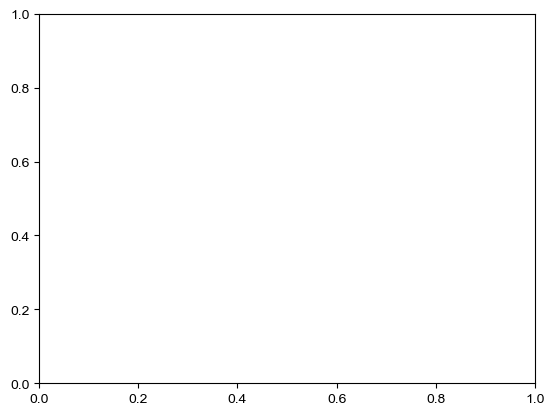

In [48]:
fig, ax = plt.subplots(1,1)

In [198]:
os.getcwd()

'C:\\GSP\\waterlevel'

In [199]:
import conda_scripts.utils.gwl_krig_preprocess as pre

In [217]:
gwl_stats = pre.collect_station_info()

The folder is C:\rich_py\conda_scripts\load_datasets
The file being read is SCWA_Proj_data_v21.xlsx
       Latitude   Longitude      Station Number Station Name      Easting  \
11    38.528954 -122.827277         SRPDMW-3-86      SRP0743          NaN   
16    38.500228 -122.886461                 RDS      LRR0231          NaN   
23    38.528954 -122.827277         SRPDMW-3-50      SRP0742          NaN   
25    38.262366 -122.605336         PVDMW-3-220      PET0193          NaN   
56    38.372169 -122.523751     382219122312501      Son0213  6411508.992   
...         ...         ...                 ...          ...          ...   
3320  38.389601 -122.748801  383896N1227488W001      SRP0270  6347041.332   
3353  38.331502 -122.667301  383315N1226673W001      SRP0236  6370245.518   
3355  38.338002 -122.721901  383380N1227219W001      SRP0240  6354602.126   
3374  38.364202 -122.723501  383642N1227235W001      SRP0247  6354219.165   
3375  38.365702 -122.653801  383657N1226538W001      

c:\rich_py\conda_scripts\utils\gwl_krig_preprocess.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statsInfo = statsInfo.append(missing)


In [213]:
import conda_scripts.wiski.wiski as wiski
cols = [
'station_carteasting',
'station_cartnorthing',
'site_no',
'site_id',
'site_name',]
x = wiski.get_stations( outfields= cols, return_gdf = False)

In [211]:
gw_stats.set_index('station_name').loc['SRP0721']

,station_no,ts_id,ts_name,parametertype_name,stationparameter_longname,stationparameter_no,ts_shortname,ts_type_name,parametertype_id,ts_unitname,from,to,Param_reclass,Site
station_name,,,,,,,,,,,,,,
SRP0721,Patio_Well,61980010,Yearly Spring Mean,Groundwater_elevation,Groundwater_elevation,GWEL,Year.Mean.P,aggmean,536.0,foot,2005-01-01 00:00:00,2022-01-01 00:00:00,Manual Measurement,SRP
SRP0721,Patio_Well,61979010,02.Final Water Elevation,Groundwater_elevation,Groundwater_elevation,GWEL,Cmd.FinalElev,cmd,536.0,foot,2005-04-01 12:00:00,2022-10-13 12:00:00,Manual Measurement,SRP


In [216]:
x.set_index('station_name').loc['SRP0721']

object_type             General;Groundwater
station_latitude                        NaN
station_longitude                       NaN
station_no                       Patio_Well
station_id                           503544
station_longname                 Patio_Well
station_carteasting                        
station_cartnorthing                       
site_no                                 SRP
site_id                               12229
site_name                  Santa Rosa Plain
Name: SRP0721, dtype: object

In [203]:
ar = pre.get_missing_stations()

In [205]:
ar.set_index('Station Name').loc['SRP0721']

KeyError: 'SRP0721'

In [202]:
gwl_stats.loc['SRP0721']

KeyError: 'SRP0721'

In [ ]:
allgw.head()

In [ ]:
maindf.shape

In [ ]:
df = maindf.reset_index()
df.loc[:,'name'] = "New"
df = df.rename(columns = {'Measurement':'Manual Measurement'})

df = pd.merge(df, info , on = 'ts_id')

dfall = allgw.append(df)
dfall.loc[:,'name'] = dfall.loc[:,'name'].fillna('Old')
dfall.loc[:,'Timestamp'] = pd.to_datetime(dfall.loc[:,'Timestamp'])

In [ ]:
dfall.shape

In [ ]:
allgw.tail()

In [ ]:
dfall.drop_duplicates(['station_name','station_name']).value_counts('station_name').sort_values()

In [ ]:
allinfo.to_csv('regression_data/allinfo_stations.csv',index=False)

In [ ]:
allinfo = conda_scripts.utils.gwl_krig_preprocess.collect_station_info()
allinfo = allinfo.loc[allinfo.loc[:,'Site Number'].isin(['SRP','Son','PET'])]
allinfo = conda_scripts.utils.gwl_krig_preprocess.add_stat_loc(allinfo)
allinfo = allinfo.loc[allinfo.loc[:,'Station Name'].isin(dfall.station_name)]

allinfo = gpd.GeoDataFrame(allinfo, crs = 4326,
                           geometry = gpd.points_from_xy(allinfo.Longitude, allinfo.Latitude))

In [ ]:
asdf

In [ ]:
path ='regression_data/allinfo_stations.csv'
if os.path.exists(path):
    allinfo = pd.read_csv(path,index_col = [0])
    
    allinfo = gpd.GeoDataFrame(allinfo, crs = 4326,
                           geometry = gpd.points_from_xy(allinfo.Longitude, allinfo.Latitude))
    
    allinfo = allinfo.rename(columns = {'Station Name.1':'Station Name'})
    allinfo.loc[:,'Station Name'] = allinfo.index
else:
    allinfo = conda_scripts.utils.gwl_krig_preprocess.collect_station_info()
    allinfo = allinfo.loc[allinfo.loc[:,'Site Number'].isin(['SRP','Son','PET'])]
    allinfo = conda_scripts.utils.gwl_krig_preprocess.add_stat_loc(allinfo)
    allinfo = allinfo.loc[allinfo.loc[:,'Station Name'].isin(dfall.station_name)]

    allinfo = gpd.GeoDataFrame(allinfo, crs = 4326,
                               geometry = gpd.points_from_xy(allinfo.Longitude, allinfo.Latitude))

allinfo.head(1)

In [ ]:
def get_resampled():
    f = dfall.loc[:,['Timestamp', 'Manual Measurement', 
                     'station_name','Site','name']].groupby(
        ['Site','station_name','name',pd.Grouper(key = 'Timestamp', freq = '1W')]).mean()
    f = f.reset_index()
    return f

resampled = get_resampled()
resampled.to_csv('regression_data/obs_data_for_website.csv',index = False)
resampled.to_csv(r"C:\website\waterlevel2\website2\obs_data_for_website.csv",index = False)
resampled.head()

In [ ]:
import plotly.express as px
from jupyter_dash import JupyterDash
# import dash. as dcc
from dash import dcc
from dash import html
# import dash_html_components as html
from dash.dependencies import Input, Output
from dash import dash_table as dt

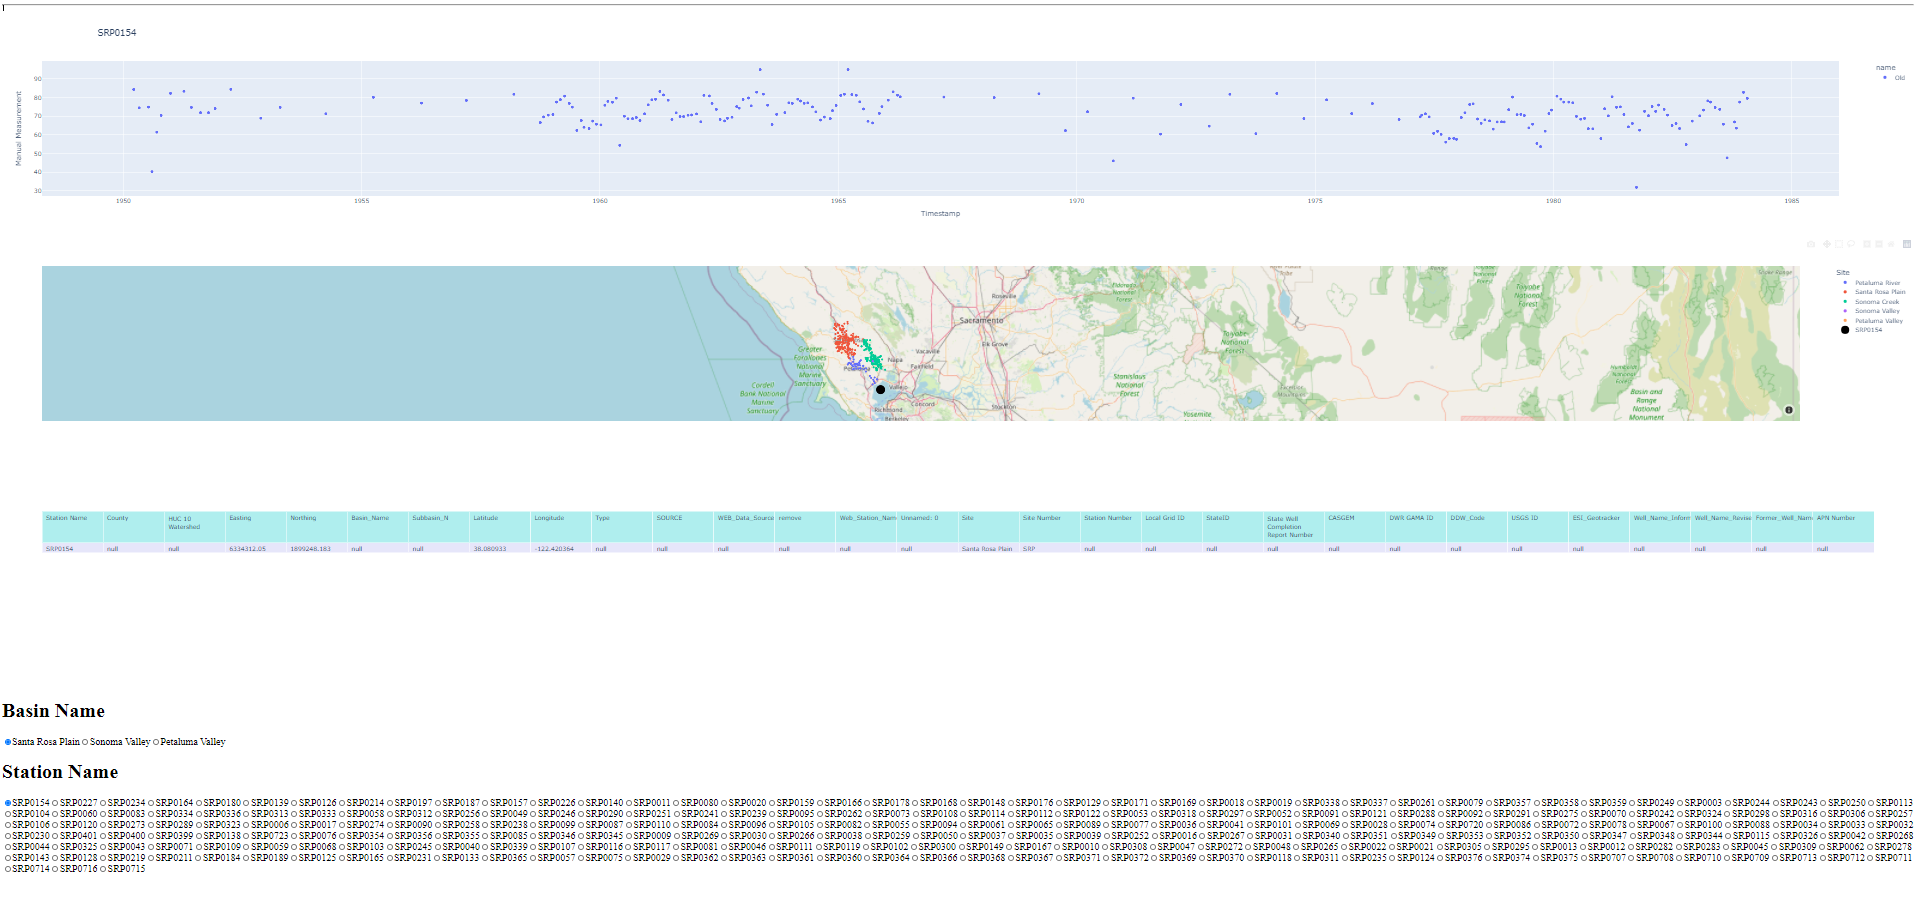

In [ ]:

def get_loc(name):
    
    loci = allinfo[allinfo.loc[:,'Station Name']==name].loc[:,'Latitude':'Longitude']
    # loci = loci.at[name,'Latitude']
    
    return [[loci.at[name,'Latitude']],[ loci.at[name,'Longitude']]]

get_loc('Son0001')

df_meas = dfall.copy()

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

all_options = {
    'Santa Rosa Plain': df_meas.query("Site=='SRP'").station_name.unique(),
    'Sonoma Valley': df_meas.query("Site=='SON'").station_name.unique(),
    'Petaluma Valley': df_meas.query("Site=='PET'").station_name.unique()   
}

app.layout = html.Div([
        html.Hr(),
    dcc.Graph(id='graph'),
    dcc.Graph(id = 'mapbox'),
    dcc.Graph(id = 'table', ),
    html.H1("Basin Name"),
    dcc.RadioItems(
        id='countries-radio',
        options=[{'label': k, 'value': k} for k in all_options.keys()],
        value='Santa Rosa Plain'
    ),
    html.H1("Station Name"),
    dcc.RadioItems(id='cities-radio'),

])


@app.callback(
    Output('cities-radio', 'options'),
    Input('countries-radio', 'value'))
def set_cities_options(selected_country):
    return [{'label': i, 'value': i} for i in all_options[selected_country]]


@app.callback(
    Output('cities-radio', 'value'),
    Input('cities-radio', 'options'))
def set_cities_value(available_options):
    return available_options[0]['value']

#update table
@app.callback(
    Output('table', 'figure'),
    Input('cities-radio', 'value'))
def set_table_value(available_options):
    fig = go.Figure(data=[go.Table(
    header=dict(values=list(allinfo.loc[:,:'APN Number'].columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=allinfo.loc[[available_options],:'APN Number'].T.to_numpy().tolist(),
               fill_color='lavender',
               align='left'))])
    return fig



@app.callback(
    # Output('display-selected-values', 'children'),
    Output('graph', 'figure'),
    # Input('countries-radio', 'value'),
    Input('cities-radio', 'value'))
def update_figure(colorscale):
    dfi = df_meas.query(f"station_name=='{colorscale}'")
    title = f"{colorscale}"
    fig =  px.scatter(
    dfi, 
    x="Timestamp", y="Manual Measurement", 
    color='name',
    render_mode="webgl", title=title
    )
    return fig

@app.callback(
    Output('mapbox', 'figure'),
    Input('cities-radio', 'value'))
def update_figure(colorscale):
    fig = px.scatter_mapbox(allinfo, lat="Latitude", lon="Longitude", hover_name="Station Name", 
                            color = 'Site',
                            hover_data=['Station Number', 'Local Grid ID', 'StateID',
                           'State Well Completion Report Number', 'CASGEM',])
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_geos(fitbounds="locations") 
    
    fig.add_trace(go.Scattermapbox(
        lat=get_loc(colorscale)[0],
        lon=get_loc(colorscale)[1],
        mode='markers+text',
        marker=go.scattermapbox.Marker(
            size=20,
            color='rgb(0, 0, 0)',
            opacity=1.00,
            symbol = 'circle'

        ),name = colorscale,
        # hoverinfo='none',
        text = [colorscale]
        
    ))
    
    # fig.update_geos(center = {'lat':get_loc(colorscale)[0][0], 'lon':get_loc(colorscale)[1][0] }, projection_scale = 1)
    return fig


if __name__ == '__main__':
    app.run_server(debug=True)

In [ ]:
# # This Code was written by Ann Marie - a Plotly Forum Moderator
# from dash import Dash, dcc, html, Input, Output, dash_table, no_update  # Dash version >= 2.0.0
# import plotly.express as px

# external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# df = px.data.gapminder()
# df["id"] = df.index
# # print(df.head(15))
# dff = df[df.year == 2007]
# columns = ["country", "continent", "lifeExp", "pop", "gdpPercap"]
# color = {"lifeExp": "#636EFA", "pop": "#EF553B", "gdpPercap": "#00CC96"}
# initial_active_cell = {"row": 0, "column": 0, "column_id": "country", "row_id": 0}

# app.layout = html.Div(
#     [
#         html.Div(
#             [
#                 html.H3("2007 Gap Minder", style={"textAlign":"center"}),
#                 dash_table.DataTable(
#                     id="table",
#                     columns=[{"name": c, "id": c} for c in columns],
#                     data=dff.to_dict("records"),
#                     page_size=10,
#                     sort_action="native",
#                     active_cell=initial_active_cell,
#                 ),
#             ],
#             style={"margin": 50},
#             className="five columns"
#         ),
#         html.Div(id="output-graph", className="six columns"),
#     ],
#     className="row"
# )


# @app.callback(
#     Output("output-graph", "children"), Input("table", "active_cell"),
# )
# def cell_clicked(active_cell):
#     if active_cell is None:
#         return no_update

#     row = active_cell["row_id"]
#     print(f"row id: {row}")

#     country = df.at[row, "country"]
#     print(country)

#     col = active_cell["column_id"]
#     print(f"column id: {col}")
#     print("---------------------")

#     y = col if col in ["pop", "gdpPercap"] else "lifeExp"

#     fig = px.line(
#         df[df["country"] == country], x="year", y=y, title=" ".join([country, y])
#     )
#     fig.update_layout(title={"font_size": 20},  title_x=0.5, margin=dict(t=190, r=15, l=5, b=5))
#     fig.update_traces(line=dict(color=color[y]))

#     return dcc.Graph(figure=fig)


# if __name__ == "__main__":
#     app.run_server(debug=True)

In [ ]:
from dash import dash_table

In [ ]:
dfall.head()

In [ ]:
allinfo.head()

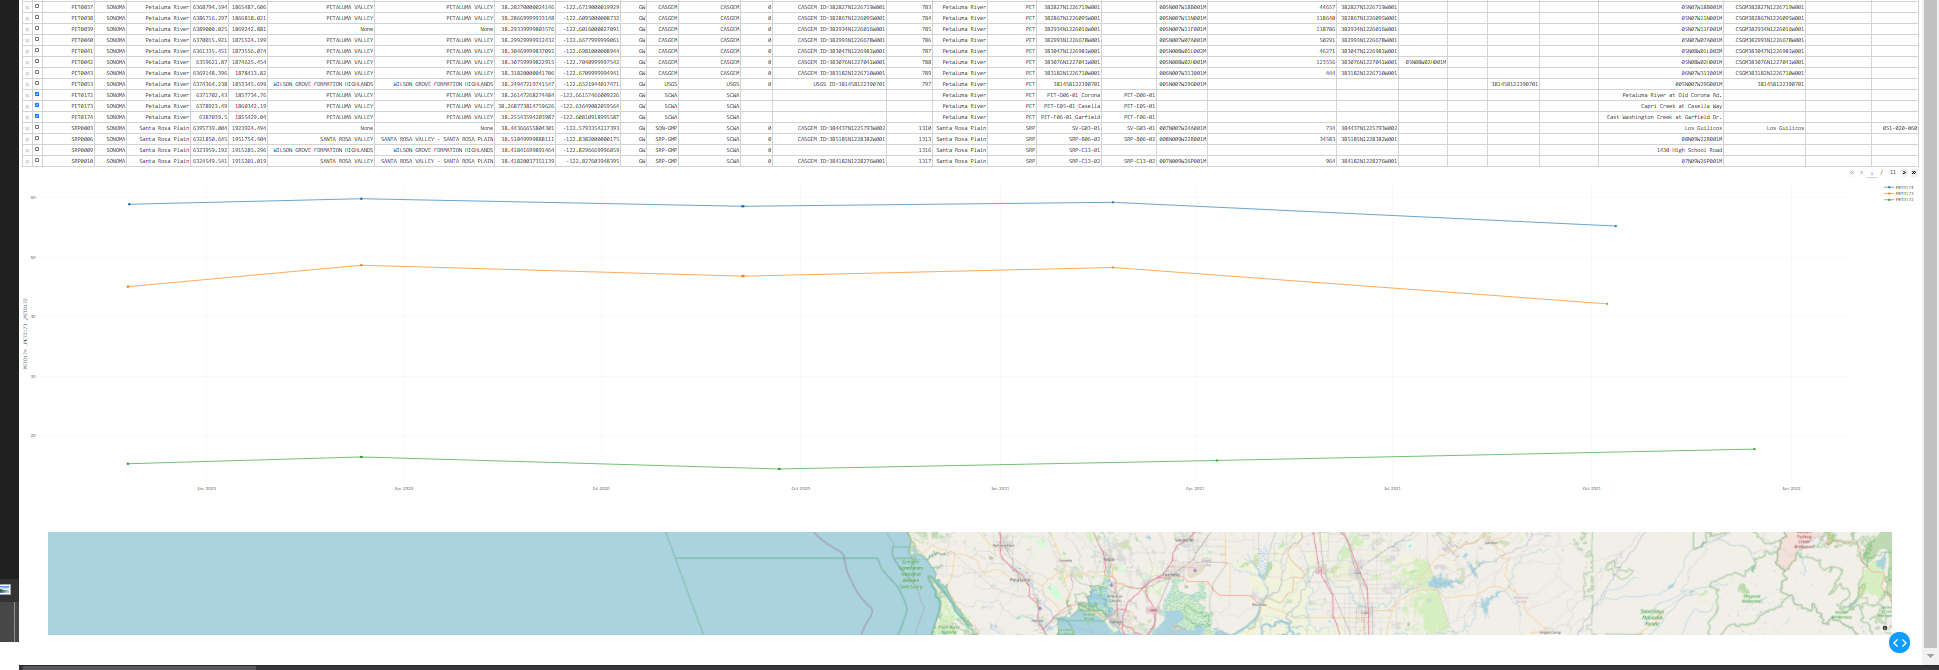

In [ ]:
dfall.loc[dfall.station_name.isin(['Son0288'])].loc[:,'Manual Measurement']

In [ ]:
df.head()

In [ ]:
# import dash
# from dash.dependencies import Input, Output
# import dash_table
# import dash_core_components as dcc
# import dash_html_components as html
# import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')
# # add an id column and set it as the index
# # in this case the unique ID is just the country name, so we could have just
# # renamed 'country' to 'id' (but given it the display name 'country'), but
# # here it's duplicated just to show the more general pattern.
# df['id'] = df['country']
# df.set_index('id', inplace=True, drop=False)

if os.path.exists('regression_data'):
    df_meas = pd.read_csv('regression_data\obs_data_for_website.csv')
else:
    df_meas = pd.read_csv('obs_data_for_website.csv')
    df_meas.loc[:,'Timestamp'] = pd.to_datetime(df_meas.loc[:,'Timestamp'] )
    
df_meas = df_meas.sort_values('Timestamp')

cols = ['id','Station Name','HUC 10 Watershed', 
       'Basin_Name', 'Subbasin_N',  'Type', 'SOURCE',
       'WEB_Data_Source',  'Web_Station_Name','Well_Depth', 'Well_Depth_Category','Reference Elevation',
        'Local Grid ID', 'StateID',
       'State Well Completion Report Number', 'CASGEM', 'DWR GAMA ID',
       'DDW_Code', 'USGS ID', 'ESI_Geotracker', 'Well_Name_Informal',
       'Well_Name_Revised', 'Former_Well_Name',]

df = allinfo.copy()
df.set_index('Station Name', inplace=True, drop=False)
df.insert(0,'id',df.loc[:,'Station Name'])


# df = df.loc[:,:'Longitude']

dfall = dfall.sort_values('Timestamp')
# df.loc[:,'id'] = df.loc[:,'Station Name']

app = JupyterDash(__name__)

app.layout = html.Div([
    dash_table.DataTable(
        id='datatable-row-ids',
        columns=[
            {'name': i, 'id': i, 'deletable': True} for i in df.loc[:,cols]
            # omit the id column
            if i != 'id'
        ],
        data=df.loc[:,cols].to_dict('records'),
        editable=True,
        filter_action="native",
        sort_action="native",
        sort_mode='multi',
        row_selectable='multi',
        row_deletable=True,
        selected_rows=[],
        page_action='native',
        page_current= 0,
        page_size= 50,
    ),
    html.Div(id='datatable-row-ids-container')
])


@app.callback(
    Output('datatable-row-ids-container', 'children'),
    Input('datatable-row-ids', 'derived_virtual_row_ids'),
    Input('datatable-row-ids', 'selected_row_ids'),
    Input('datatable-row-ids', 'active_cell'))
def update_graphs(row_ids, selected_row_ids, active_cell):
    # When the table is first rendered, `derived_virtual_data` and
    # `derived_virtual_selected_rows` will be `None`. This is due to an
    # idiosyncrasy in Dash (unsupplied properties are always None and Dash
    # calls the dependent callbacks when the component is first rendered).
    # So, if `rows` is `None`, then the component was just rendered
    # and its value will be the same as the component's dataframe.
    # Instead of setting `None` in here, you could also set
    # `derived_virtual_data=df.to_rows('dict')` when you initialize
    # the component.
    selected_id_set = set(selected_row_ids or [])
    # print(row_ids)
    if row_ids is None:
        dff = df
        # pandas Series works enough like a list for this to be OK
        row_ids = df['id']
        # print('asdf')
        # print(row_ids)
    else:
        # print('bbbbb')
        dff = df.loc[row_ids]

    active_row_id = active_cell['row_id'] if active_cell else None

    colors = ['#FF69B4' if id == active_row_id
              else '#7FDBFF' if id in selected_id_set
              else '#0074D9'
              for id in row_ids]
    
  
    
    
    return [
        dcc.Graph(
            id= '--row-ids',
            figure={
                'data': 
                   [ {
                        'x': df_meas.loc[df_meas.station_name.isin([cid]),'Timestamp'],
                        'y': df_meas.loc[df_meas.station_name.isin([cid]),'Manual Measurement'],
                        'type': 'scatter',
                        'name':cid
                    }  for cid in selected_id_set]
                ,
                'layout': {
                    'xaxis': {'automargin': True},
                    'yaxis': {
                        'automargin': True,
                        'title': {'text': '  ,'.join(selected_id_set)}
                    },
                    'height': 1000,
                    'margin': {'t': 10, 'l': 10, 'r': 10},
                },
            },
        ),

        

        
        dcc.Graph(id = 'map',
                  figure= px.scatter_mapbox(df.query("id.isin(@selected_id_set)"),
                                lat = 'Latitude',
                                          size = [20]*df.query("id.isin(@selected_id_set)").shape[0],
                                            lon = 'Longitude', 
                                  labels = df.query("id.isin(@selected_id_set)").id,   
                                mapbox_style='open-street-map'))

        
        # check if column exists - user may have deleted it
        # If `column.deletable=False`, then you don't
        # need to do this check.
        # for column in ['pop', 'lifeExp', 'gdpPercap'] if column in dff
    ]


if __name__ == '__main__':
    app.run_server(debug=True)

In [ ]:
import plotly.graph_objects as go

# token = open(".mapbox_token").read() # you need your own token

fig = go.Figure(go.Scattermapbox(
    mode = "markers+text+lines",
    lon = [-75, -80, -50], lat = [45, 20, -20],
    marker = {'size': 20, 'symbol': ["bus", "harbor", "airport"]},
    text = ["Bus", "Harbor", "airport"],textposition = "bottom right"))

fig.update_layout(
    mapbox = {
        # 'accesstoken': token,
        'style': "open-street-map", 'zoom': 0.7},
    showlegend = False)

fig.show()

In [ ]:
# # Build App
# app = JupyterDash(__name__)
# app.layout = html.Div([
#     html.H1("JupyterDash Demo"),
#     dcc.Graph(id='graph'),
#     html.Label([
#         "colorscale",
#         dcc.Dropdown(
#             id='colorscale-dropdown', clearable=False,
#             value='Son0001', options=[
#                 {'label': c, 'value': c}
#                 for c in np.sort(dfall.station_name.unique())
#             ])
#     ]),
# ])
# # Define callback to update graph
# @app.callback(
#     Output('graph', 'figure'),
#     [Input("colorscale-dropdown", "value")]
# )
# def update_figure(colorscale):
#     dfi = dfall.query(f"station_name=='{colorscale}'")
#     fig =  px.scatter(
#     dfi, 
#     x="Timestamp", y="Manual Measurement", 
#     color="name",
#     render_mode="webgl", title=colorscale
#     )
    
#     return fig
# # Run app and display result inline in the notebook
# app.run_server(mode='inline')

In [ ]:
from dash import Dash, dcc, html, Input, Output
import pandas as pd

# 

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(
    [
        html.Button("Download CSV", id="btn_csv"),
        dcc.Download(id="download-dataframe-csv"),
    ]
)

df = pd.DataFrame({"a": [1, 2, 3, 4], "b": [2, 1, 5, 6], "c": ["x", "x", "y", "y"]})


@app.callback(
    Output("download-dataframe-csv", "data"),
    Input("btn_csv", "n_clicks"),
    prevent_initial_call=True,
)
def func(n_clicks):
    return dcc.send_data_frame(df.to_csv, "mydf.csv")


if __name__ == "__main__":
    app.run_server(debug=True,port = 8051)